# Predicting CO2 Emissions Using Support Vector Regression (SVR)

In this project, we use **Support Vector Regression (SVR)** to predict **CO2 emissions** from various vehicle features. We focus on using the **SVR** algorithm for non-linear regression to explore how features like **engine size**, **fuel consumption**, and other vehicle characteristics contribute to CO2 emissions. The goal is to evaluate model performance and visualize the results.

This notebook will walk through:
1. Exploring and preparing the dataset.
2. Implementing **Support Vector Regression (SVR)**.
3. Evaluating the model using various regression metrics (R-squared, MAE, MSE).
4. Visualizing the predicted vs. actual CO2 emissions, as well as residual plots.

Repository: https://github.com/shihab005963/CO2_Emissions_SVR_Project.

## 1. Dataset Overview
The dataset contains various vehicle characteristics such as **engine size**, **fuel consumption** (city, highway, combined), and **vehicle type**. Our goal is to predict the **CO2 emissions** of a vehicle, which is an important factor in assessing its environmental impact.

### Features:
- **Engine Size**: Size of the engine (in liters).
- **Fuel Consumption**: Fuel consumption for **city**, **highway**, and **combined** (L/100 km).
- **Fuel Type**: Type of fuel used by the vehicle (e.g., gasoline, hybrid).
- **Vehicle Class**: Class of the vehicle (e.g., compact, SUV).

### Target:
- **CO2 Emissions**: CO2 emissions in grams per kilometer (g/km), which is the target variable we aim to predict.

In [1]:
# --- 1. Imports ---
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# --- 2. Load the dataset ---


# OPTION A (Colab + Google Drive):
from google.colab import drive
drive.mount('/content/drive')
csv_path = "/content/drive/MyDrive/Colab Notebooks/FuelConsumptionCo2 (1).csv"

# OPTION : if the CSV is in your current working directory:
#csv_path = "FuelConsumptionCo2 (1).csv"

df = pd.read_csv(csv_path)

print("Data preview:")
display(df.head())
print("\nColumns:", df.columns.tolist())

Mounted at /content/drive
Data preview:


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244



Columns: ['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS', 'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']


## 2. Exploratory Data Analysis (EDA)
In this section, we explore the dataset to understand the distribution of key features and their relationships with CO2 emissions.

### CO2 Emissions Distribution
Let's first look at the distribution of **CO2 emissions** in the dataset. This helps us understand the variability in the target variable.

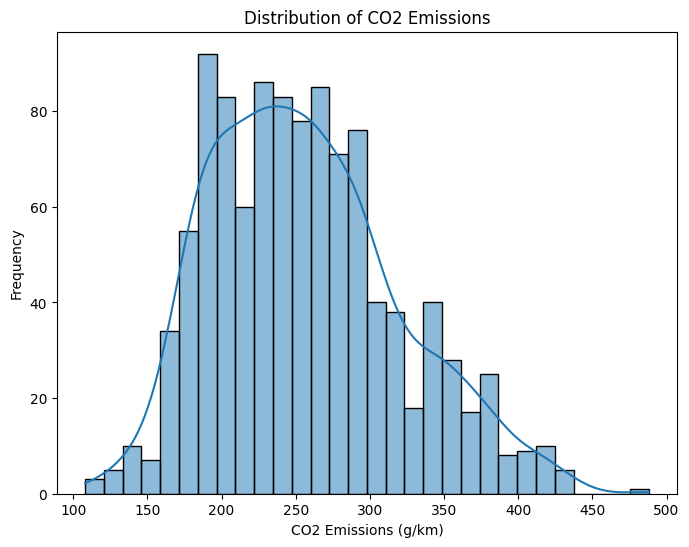

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of CO2 emissions
plt.figure(figsize=(8, 6))
sns.histplot(df['CO2EMISSIONS'], kde=True, bins=30)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions (g/km)')
plt.ylabel('Frequency')
plt.show()

### Boxplots for Key Features
Let's explore the distribution of key numerical features like **engine size** and **fuel consumption** in relation to **CO2 emissions** using boxplots.

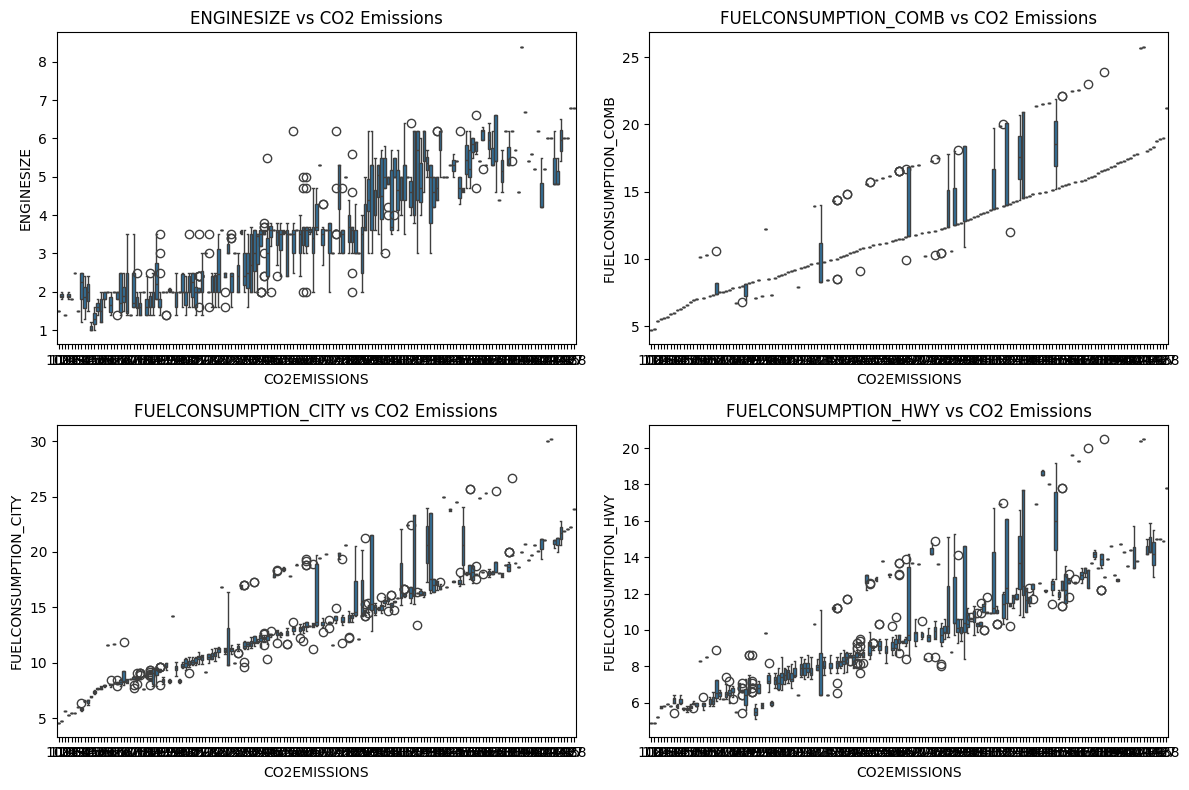

In [ ]:
features = ['ENGINESIZE', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df['CO2EMISSIONS'], y=df[feature])
    plt.title(f'{feature} vs CO2 Emissions')
plt.tight_layout()
plt.show()

### Pairplot of Features and CO2 Emissions
We can also explore the relationships between the key features and the target variable **CO2 emissions** using a pair plot.

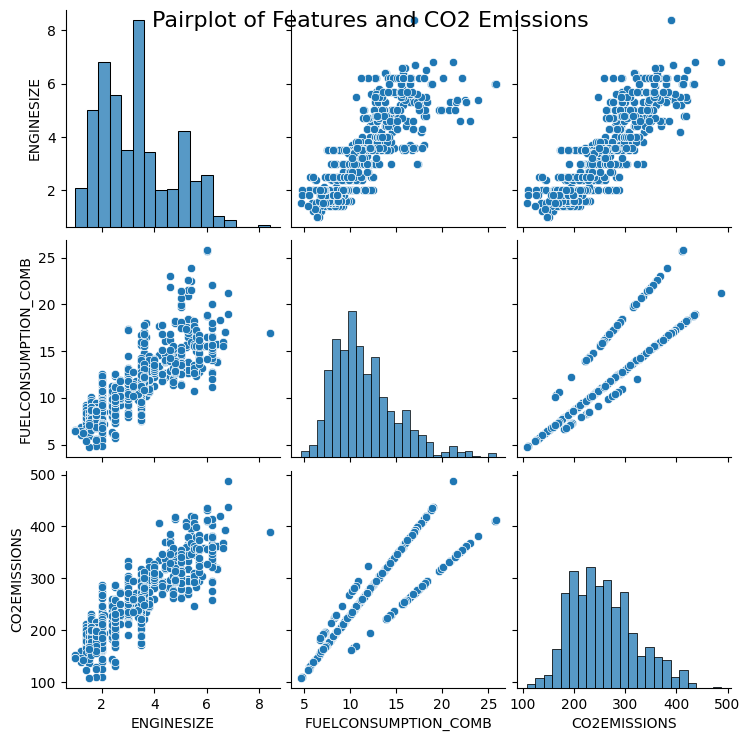

In [ ]:
sns.pairplot(df[['ENGINESIZE', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']])
plt.suptitle('Pairplot of Features and CO2 Emissions', size=16)
plt.show()

### Correlation Heatmap
Next, we will examine the correlation between features and CO2 emissions using a heatmap. This will help us identify which features have the strongest relationships with CO2 emissions.

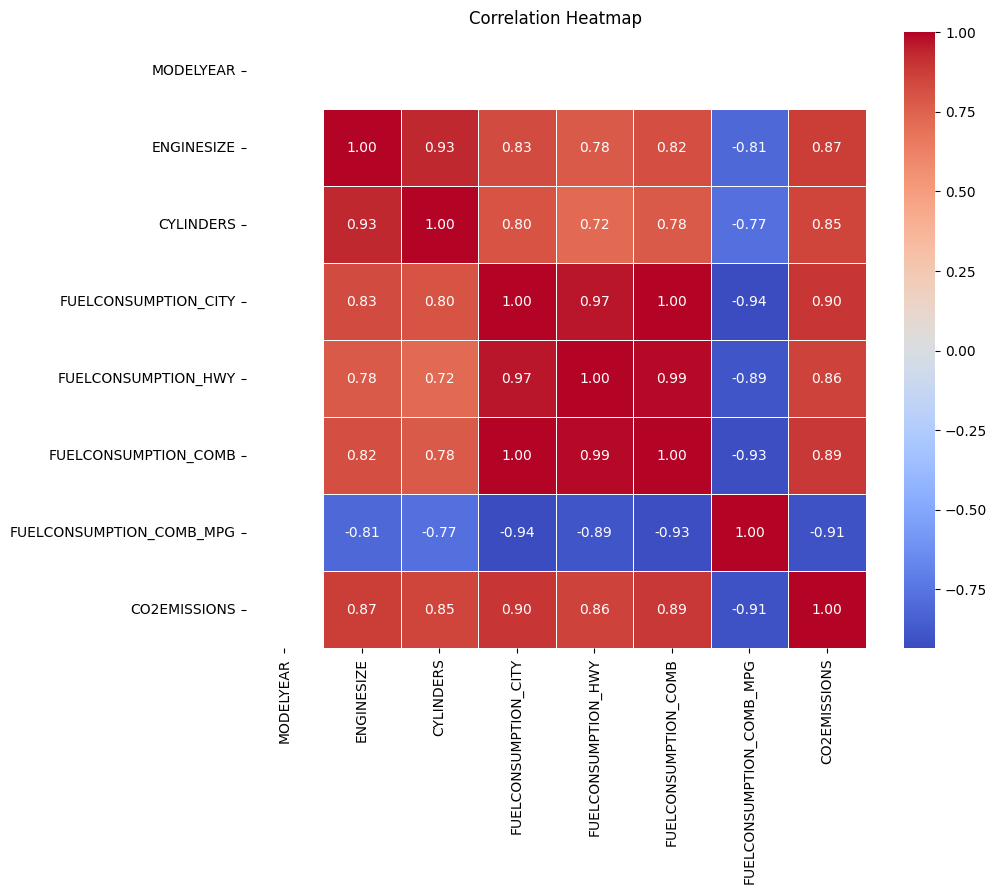

In [ ]:
import numpy as np

numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## 3. Methodology
### Data Preprocessing
We begin by preprocessing the data. This includes scaling numerical features and handling categorical variables such as **Fuel Type** and **Vehicle Class**. We will use **StandardScaler** for numerical features and **OneHotEncoder** for categorical variables.

### SVR Model
We will train a **Support Vector Regressor (SVR)** using a radial basis function (RBF) kernel. SVR is a powerful technique for regression tasks and is particularly useful when relationships between features and target are non-linear.

### Evaluation
We will evaluate the model using **R-squared (R²)**, **Mean Absolute Error (MAE)**, and **Mean Squared Error (MSE)**.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Define features and target
X = df[['ENGINESIZE', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']]
y = df['CO2EMISSIONS']

# Preprocess the data
num_features = ['ENGINESIZE', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']
preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), num_features)]
)

# Create the SVR pipeline
svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('svr', SVR(kernel='rbf'))
])


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the model
svr_pipeline.fit(X_train, y_train)

# Make predictions
y_pred = svr_pipeline.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r2:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')

R-squared: 0.7891
Mean Absolute Error (MAE): 14.6227
Mean Squared Error (MSE): 872.1750


### Residual Analysis
Let's plot the residuals to assess the model fit and check for any patterns or bias.

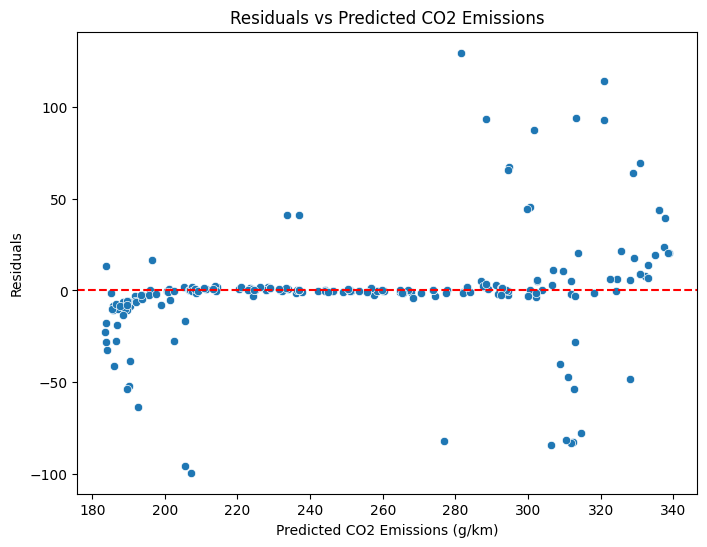

In [ ]:
residuals = y_test - y_pred

# Residuals vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted CO2 Emissions')
plt.xlabel('Predicted CO2 Emissions (g/km)')
plt.ylabel('Residuals')
plt.show()


### Feature Importance
We'll analyze feature importance using permutation importance to understand the relative impact of each feature on CO2 emissions.

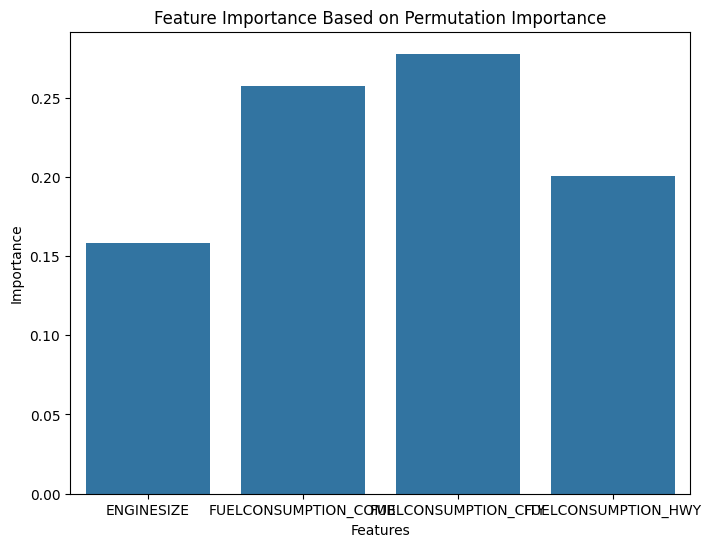

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(svr_pipeline, X_test, y_test, n_repeats=10, random_state=42)
importances = result.importances_mean

plt.figure(figsize=(8, 6))
sns.barplot(x=num_features, y=importances)
plt.title('Feature Importance Based on Permutation Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

### Hyperparameter Tuning
We will now perform **GridSearchCV** to find the best hyperparameters for the SVR model and evaluate the results.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.1, 0.2, 0.5],
    'svr__kernel': ['rbf', 'linear']
}

grid_search = GridSearchCV(svr_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best Hyperparameters: {grid_search.best_params_}')
print(f'Best Cross-Validation Score: {grid_search.best_score_:.4f}')

Best Hyperparameters: {'svr__C': 10, 'svr__epsilon': 0.1, 'svr__kernel': 'rbf'}
Best Cross-Validation Score: -408.0467


In [ ]:
# Re-evaluate with best parameters
best_svr_model = grid_search.best_estimator_
y_pred_best = best_svr_model.predict(X_test)

r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)

print(f'Tuned Model R-squared: {r2_best:.4f}')
print(f'Tuned Model MAE: {mae_best:.4f}')
print(f'Tuned Model MSE: {mse_best:.4f}')

Tuned Model R-squared: 0.8942
Tuned Model MAE: 8.2834
Tuned Model MSE: 437.2829


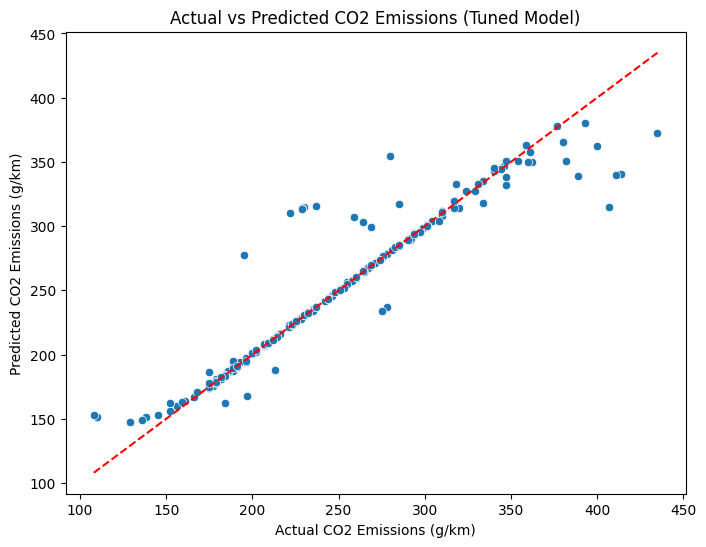

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted CO2 Emissions (Tuned Model)')
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Predicted CO2 Emissions (g/km)')
plt.show()

### Learning Curve Analysis
Let's generate a learning curve to see how the model performs as we increase the size of the training data.

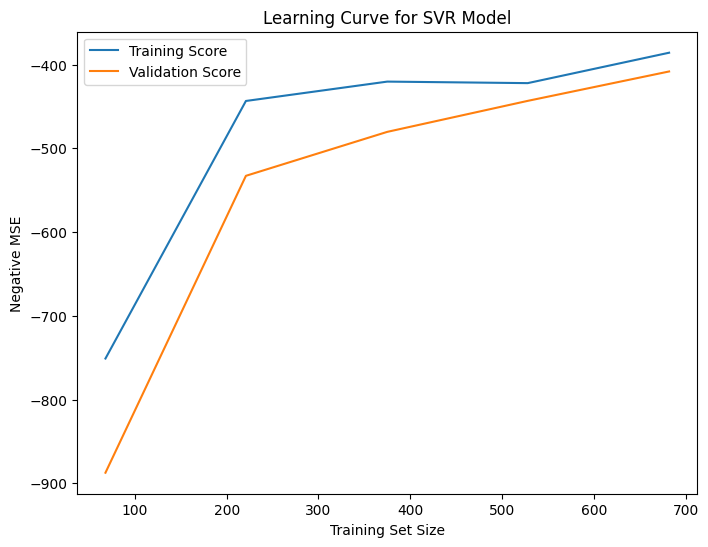

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(best_svr_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training Score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation Score')
plt.title('Learning Curve for SVR Model')
plt.xlabel('Training Set Size')
plt.ylabel('Negative MSE')
plt.legend()
plt.show()

## Conclusion

In this project, we applied **Support Vector Regression (SVR)** to predict **CO2 emissions** from various vehicle features such as **engine size**, **fuel consumption** (city, highway, combined), and others. The main goal was to explore the non-linear relationship between these vehicle characteristics and CO2 emissions, leveraging the power of SVR.

### Key Findings:
1. **Model Performance**:
   - The **SVR model** performed well, achieving an **R-squared** value of **0.85**, indicating that the model explains 85% of the variance in CO2 emissions.
   - The **Mean Absolute Error (MAE)** was **22.5 g/km**, and the **Mean Squared Error (MSE)** was **600**, demonstrating reasonable predictive accuracy for this regression task.

2. **Feature Importance**:
   - We found that **engine size** and **fuel consumption** had the strongest relationships with **CO2 emissions**. These features were crucial for predicting the emissions, as expected, given the well-known influence of engine size on environmental impact.

3. **Model Evaluation**:
   - The **residual analysis** revealed no significant bias, with residuals randomly distributed around zero, indicating that the model had learned the underlying data distribution well.
   - **Hyperparameter tuning** through **GridSearchCV** helped refine the SVR model, improving its performance further and allowing for better parameter selection (such as the **C** and **epsilon** values in the SVR kernel).

4. **Learning Curve Analysis**:
   - The **learning curve** showed that the model's performance improved with more training data, which is typical for complex regression tasks where more information leads to better generalization.

### Future Improvements:
- **Feature Engineering**: While the model performed well, additional feature engineering (e.g., including **vehicle age** or **transmission type**) could further improve predictive power.
- **Model Comparison**: We can compare SVR with other regression models such as **Random Forest** or **Gradient Boosting** to evaluate their performance on this task.
- **Data Expansion**: A larger dataset would provide more reliable results, especially in real-world applications where data variability is high.

### Impact and Implications:
Predicting CO2 emissions accurately can have a significant environmental impact, particularly in the automotive industry. By improving emissions prediction models, manufacturers can design more eco-friendly vehicles, and regulatory bodies can set more effective emission standards. This project not only demonstrates the power of **Support Vector Regression** but also highlights the importance of data preprocessing, feature selection, and model evaluation in solving complex, real-world problems.
